练习R语言方差分析。

# 单因素方差分析

## 方差分析

以multcomp包中的cholesterol数据集为例（取自Westfall、Tobia、Rom、Hochberg,1999）,50个患者均接受降低胆固醇药物治疗（trt）五种疗法中的一种疗法。其中三种治疗条件使用药物相同，分别是20mg一天一次（1time）、10mg一天两次（2times）和5mg一天四次（4times）。剩下的两种方式（drugD和drugE）代表候选药物。

In [1]:
library(multcomp)

载入需要的程序包：mvtnorm
载入需要的程序包：survival
载入需要的程序包：TH.data
载入需要的程序包：MASS

载入程序包：‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



In [2]:
cholesterol

      trt response
1   1time   3.8612
2   1time  10.3868
3   1time   5.9059
4   1time   3.0609
5   1time   7.7204
6   1time   2.7139
7   1time   4.9243
8   1time   2.3039
9   1time   7.5301
10  1time   9.4123
11 2times  10.3993
12 2times   8.6027
13 2times  13.6320
14 2times   3.5054
15 2times   7.7703
16 2times   8.6266
17 2times   9.2274
18 2times   6.3159
19 2times  15.8258
20 2times   8.3443
21 4times  13.9621
22 4times  13.9606
23 4times  13.9176
24 4times   8.0534
25 4times  11.0432
26 4times  12.3692
27 4times  10.3921
28 4times   9.0286
29 4times  12.8416
30 4times  18.1794
31  drugD  16.9819
32  drugD  15.4576
33  drugD  19.9793
34  drugD  14.7389
35  drugD  13.5850
36  drugD  10.8648
37  drugD  17.5897
38  drugD   8.8194
39  drugD  17.9635
40  drugD  17.6316
41  drugE  21.5119
42  drugE  27.2445
43  drugE  20.5199
44  drugE  15.7707
45  drugE  22.8850
46  drugE  23.9527
47  drugE  21.5925
48  drugE  18.3058
49  drugE  20.3851
50  drugE  17.3071

In [3]:
table(cholesterol$trt)


 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

In [6]:
aggregate(cholesterol$response, by=list(cholesterol$trt), FUN=mean)

  Group.1        x
1   1time  5.78197
2  2times  9.22497
3  4times 12.37478
4   drugD 15.36117
5   drugE 20.94752

In [7]:
aggregate(cholesterol$response, by=list(cholesterol$trt), FUN=sd)

  Group.1        x
1   1time 2.878113
2  2times 3.483054
3  4times 2.923119
4   drugD 3.454636
5   drugE 3.345003

In [9]:
fit <- aov(response~trt, data=cholesterol)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

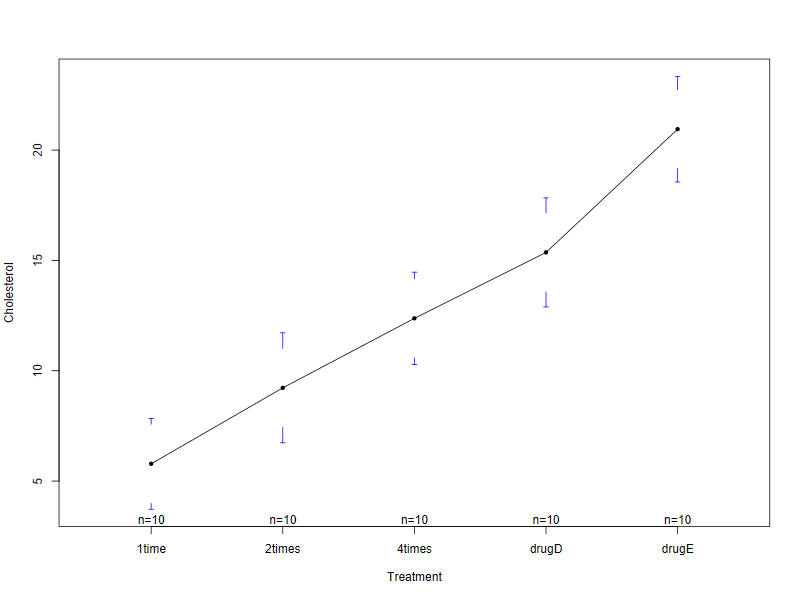

In [11]:
library(gplots)
plotmeans(cholesterol$response~cholesterol$trt, xlab="Treatment", ylab="Cholesterol", pch=20)

## 多重比较

In [12]:
TukeyHSD(fit)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ trt, data = cholesterol)

$trt
                  diff        lwr       upr     p adj
2times-1time   3.44300 -0.6582817  7.544282 0.1380949
4times-1time   6.59281  2.4915283 10.694092 0.0003542
drugD-1time    9.57920  5.4779183 13.680482 0.0000003
drugE-1time   15.16555 11.0642683 19.266832 0.0000000
4times-2times  3.14981 -0.9514717  7.251092 0.2050382
drugD-2times   6.13620  2.0349183 10.237482 0.0009611
drugE-2times  11.72255  7.6212683 15.823832 0.0000000
drugD-4times   2.98639 -1.1148917  7.087672 0.2512446
drugE-4times   8.57274  4.4714583 12.674022 0.0000037
drugE-drugD    5.58635  1.4850683  9.687632 0.0030633


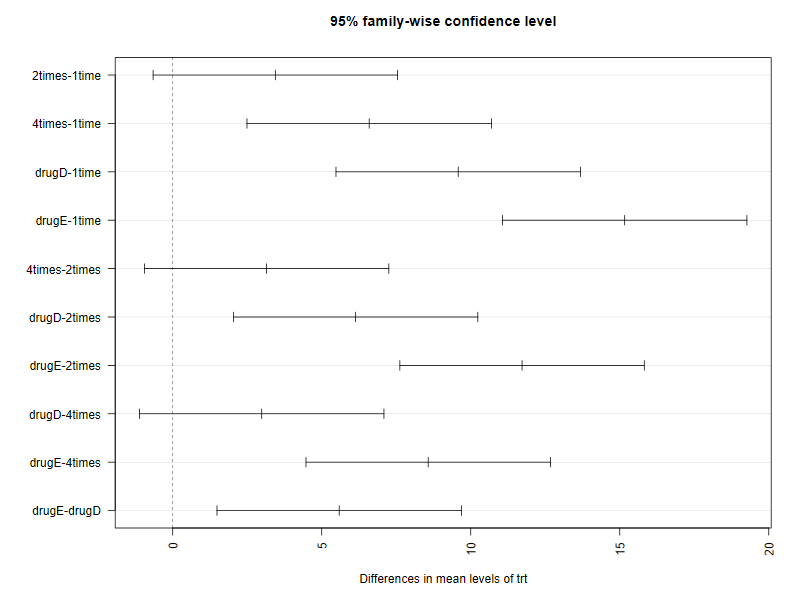

In [13]:
par(las=2)
par(mar=c(5, 8, 4, 2))
plot(TukeyHSD(fit))

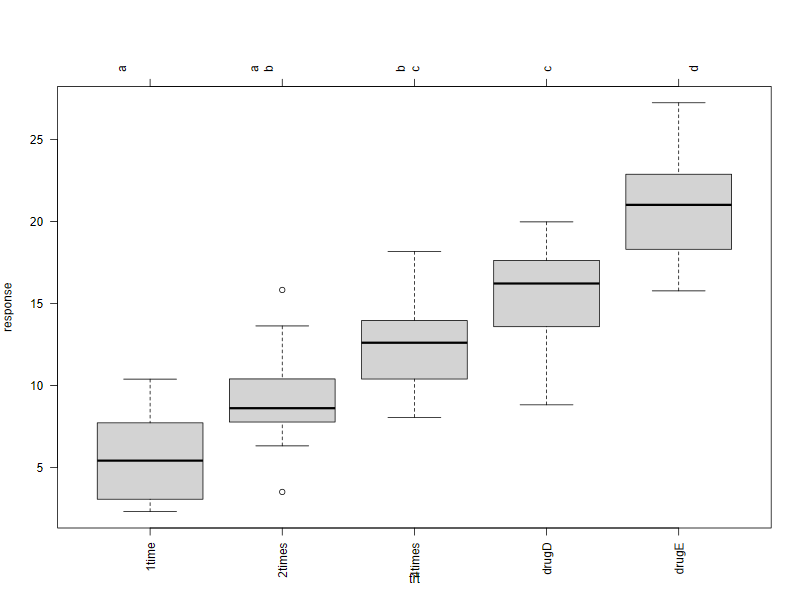

In [18]:
library(multcomp)
par(mar=c(5, 4, 6, 2))
tuk <- glht(fit, linfct = mcp(trt = "Tukey"))
plot(cld(tuk, levels=0.05), col="lightgrey")

Positron任重而道远啊，画出来老是有问题。

## 评估检验的假设条件

使用qq图验证正态性假设：

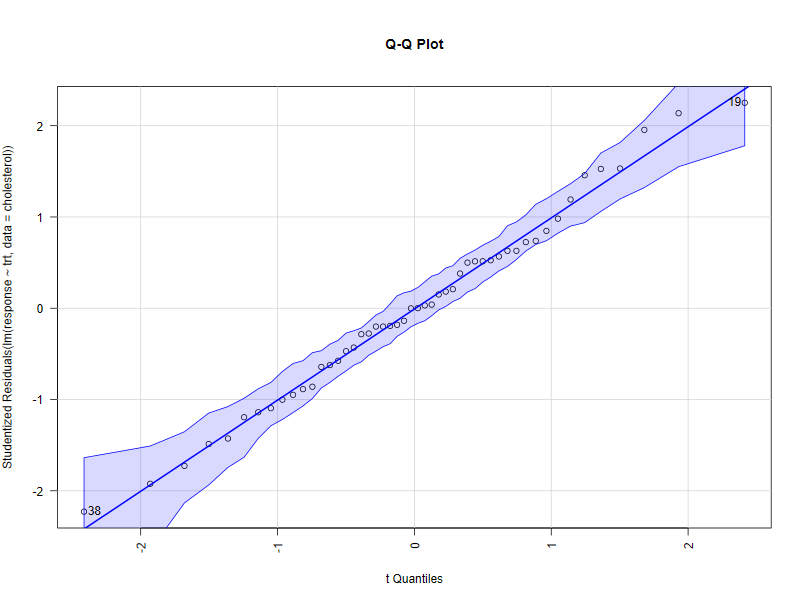

[1] 19 38

In [20]:
library(car)
qqPlot(
  lm(response~trt, data=cholesterol),
  simulate=TRUE,
  main="Q-Q Plot",
  labels=FALSE
)

In [21]:
bartlett.test(response~trt, data=cholesterol)


	Bartlett test of homogeneity of variances

data:  response by trt
Bartlett's K-squared = 0.57975, df = 4, p-value = 0.9653


In [22]:
fligner.test(response~trt, data=cholesterol)


	Fligner-Killeen test of homogeneity of variances

data:  response by trt
Fligner-Killeen:med chi-squared = 0.74277, df = 4, p-value = 0.946


In [24]:
library(HH)
hov(response~trt, data=cholesterol)


	hov: Brown-Forsyth

data:  response
F = 0.075477, df:trt = 4, df:Residuals = 45, p-value = 0.9893
alternative hypothesis: variances are not identical


In [26]:
# 检验离群点
library(car)
outlierTest(fit)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
19 2.251149           0.029422           NA

# 单因素协方差分析

## 方差分析

下面的例子来自于multcomp包中的litter数据集（见Westfall et al.,1999）​。怀孕小鼠被分为四个小组，每个小组接受不同剂量（0、5、50或500）的药物处理。产下幼崽的体重均值为因变量，怀孕时间为协变量。

In [27]:
library(multcomp)
litter

   dose weight gesttime number
1     0  28.05     22.5     15
2     0  33.33     22.5     14
3     0  36.37     22.0     14
4     0  35.52     22.0     13
5     0  36.77     21.5     15
6     0  29.60     23.0      5
7     0  27.72     21.5     16
8     0  33.67     22.5     15
9     0  32.55     22.5     14
10    0  32.78     21.5     15
11    0  31.05     22.0     12
12    0  33.40     22.5     15
13    0  30.20     22.0     16
14    0  28.63     21.5      7
15    0  33.38     22.0     15
16    0  33.43     22.0     13
17    0  29.63     21.5     14
18    0  33.08     22.0     15
19    0  31.53     22.5     16
20    0  35.48     22.0      9
21    5  34.83     22.5     15
22    5  26.33     22.5      7
23    5  24.28     22.5     15
24    5  38.63     23.0      9
25    5  27.92     22.0     13
26    5  33.85     22.5     13
27    5  24.95     22.5     17
28    5  33.20     22.5     15
29    5  36.03     22.5     12
30    5  26.80     22.0     13
31    5  31.67     22.0     14
32    5 

In [28]:
table(litter$dose)


  0   5  50 500 
 20  19  18  17 

In [29]:
aggregate(litter$weight, by=list(litter$dose), FUN=mean)

  Group.1        x
1       0 32.30850
2       5 29.30842
3      50 29.86611
4     500 29.64647

In [30]:
fit <- aov(weight~gesttime+dose, data=litter)
summary(fit)

            Df Sum Sq Mean Sq F value  Pr(>F)   
gesttime     1  134.3  134.30   8.049 0.00597 **
dose         3  137.1   45.71   2.739 0.04988 * 
Residuals   69 1151.3   16.69                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [31]:
library(effects)
effect("dose", fit)

Use the command
    lattice::trellis.par.set(effectsTheme())
  to customize lattice options for effects plots.
See ?effectsTheme for details.



 dose effect
dose
       0        5       50      500 
32.35367 28.87672 30.56614 29.33460 

## 多重比较

In [33]:
library(multcomp)
contrast <- rbind("no dryg vs. drug"=c(3, -1, -1, -1))
contrast

                 [,1] [,2] [,3] [,4]
no dryg vs. drug    3   -1   -1   -1

In [40]:
summary(glht(fit, linfct=mcp(dose="Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = weight ~ gesttime + dose, data = litter)

Linear Hypotheses:
              Estimate Std. Error t value Pr(>|t|)  
5 - 0 == 0     -3.4769     1.3175  -2.639   0.0494 *
50 - 0 == 0    -1.7875     1.3437  -1.330   0.5468  
500 - 0 == 0   -3.0191     1.3524  -2.232   0.1246  
50 - 5 == 0     1.6894     1.3919   1.214   0.6201  
500 - 5 == 0    0.4579     1.3642   0.336   0.9868  
500 - 50 == 0  -1.2315     1.4192  -0.868   0.8213  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [37]:
mat <- matrix(c(1, -1, 0, 0, 1, 0, -1, 0, 1, 0, 0, -1), 3, 4, byrow = TRUE)
mat

     [,1] [,2] [,3] [,4]
[1,]    1    1    0    0
[2,]    1    0    1    0
[3,]    1    0    0    1

In [39]:
summary(glht(fit, linfct=mcp(dose=mat)))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ gesttime + dose, data = litter)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)  
1 == 0   -3.477      1.318  -2.639   0.0282 *
2 == 0   -1.788      1.344  -1.330   0.4163  
3 == 0   -3.019      1.352  -2.232   0.0757 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


## 评估检验的假设条件

In [41]:
# Tukey检验
library(multcomp)
summary(glht(fit, linfct=mcp(dose="Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = weight ~ gesttime + dose, data = litter)

Linear Hypotheses:
              Estimate Std. Error t value Pr(>|t|)  
5 - 0 == 0     -3.4769     1.3175  -2.639   0.0492 *
50 - 0 == 0    -1.7875     1.3437  -1.330   0.5468  
500 - 0 == 0   -3.0191     1.3524  -2.232   0.1248  
50 - 5 == 0     1.6894     1.3919   1.214   0.6201  
500 - 5 == 0    0.4579     1.3642   0.336   0.9868  
500 - 50 == 0  -1.2315     1.4192  -0.868   0.8213  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [46]:
# Dunnett检验
library(multcomp)
mat <- matrix(c(-1, 1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 1), 3, 4, byrow = TRUE)
summary(glht(fit, linfct=mcp(dose=mat)))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ gesttime + dose, data = litter)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)  
1 == 0   -3.477      1.318  -2.639   0.0279 *
2 == 0   -1.788      1.344  -1.330   0.4163  
3 == 0   -3.019      1.352  -2.232   0.0757 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [44]:
# Dunnett检验
library(multcomp)
summary(glht(fit, linfct=mcp(dose="Dunnett")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = weight ~ gesttime + dose, data = litter)

Linear Hypotheses:
             Estimate Std. Error t value Pr(>|t|)  
5 - 0 == 0     -3.477      1.318  -2.639   0.0281 *
50 - 0 == 0    -1.788      1.344  -1.330   0.4163  
500 - 0 == 0   -3.019      1.352  -2.232   0.0759 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


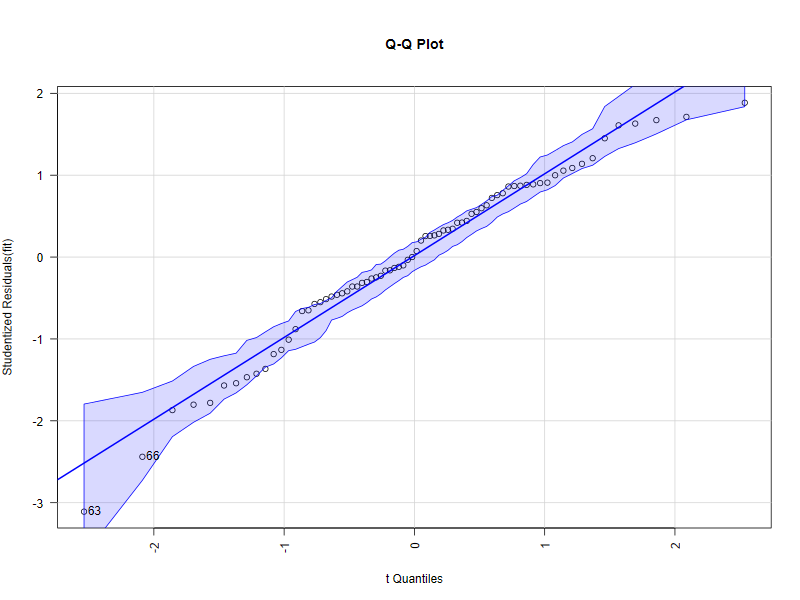

[1] 63 66

In [48]:
library(car)
qqPlot(fit, main="Q-Q Plot")

In [58]:
bartlett.test(weight~dose, data=litter)


	Bartlett test of homogeneity of variances

data:  weight by dose
Bartlett's K-squared = 9.6497, df = 3, p-value = 0.02179


In [60]:
library(multcomp)
fit2 <- aov(weight~gesttime*dose, data=litter)
summary(fit2)

              Df Sum Sq Mean Sq F value  Pr(>F)   
gesttime       1  134.3  134.30   8.289 0.00537 **
dose           3  137.1   45.71   2.821 0.04556 * 
gesttime:dose  3   81.9   27.29   1.684 0.17889   
Residuals     66 1069.4   16.20                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## 结果可视化

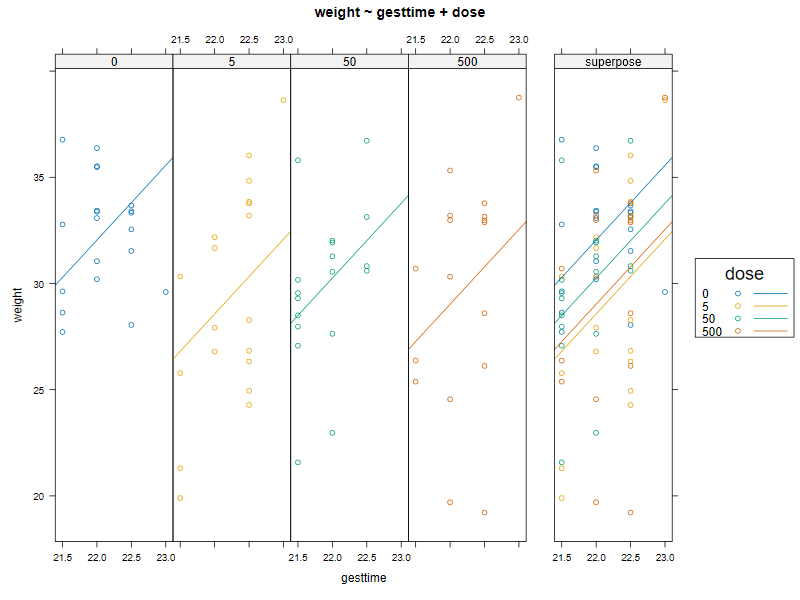

Analysis of Variance Table

Response: weight
          Df  Sum Sq Mean Sq F value   Pr(>F)   
gesttime   1  134.30 134.304  8.0493 0.005971 **
dose       3  137.12  45.708  2.7394 0.049883 * 
Residuals 69 1151.27  16.685                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [61]:
library(HH)
ancova(weight~gesttime+dose, data=litter)

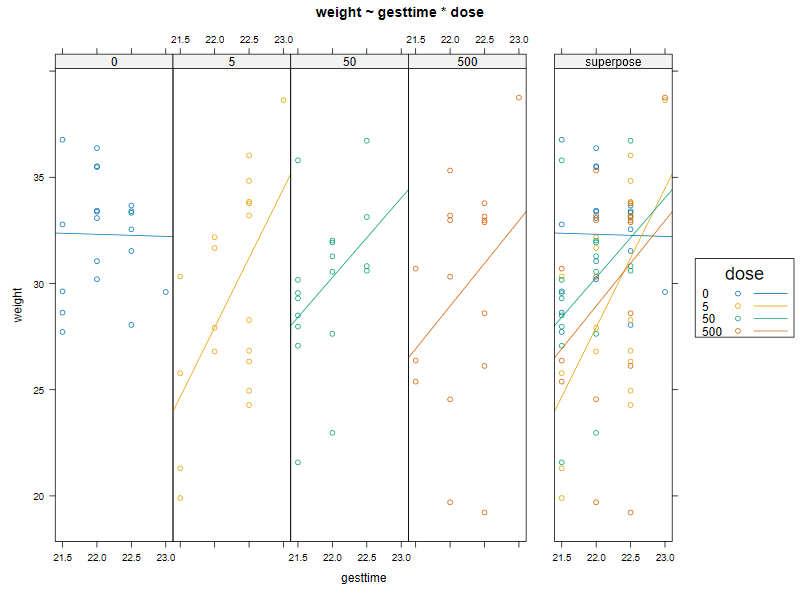

Analysis of Variance Table

Response: weight
              Df  Sum Sq Mean Sq F value   Pr(>F)   
gesttime       1  134.30 134.304  8.2888 0.005372 **
dose           3  137.12  45.708  2.8209 0.045562 * 
gesttime:dose  3   81.87  27.289  1.6842 0.178889   
Residuals     66 1069.40  16.203                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [62]:
library(HH)
ancova(weight~gesttime*dose, data=litter)

# 双因素方差分析

In [1]:
ToothGrowth

    len supp dose
1   4.2   VC  0.5
2  11.5   VC  0.5
3   7.3   VC  0.5
4   5.8   VC  0.5
5   6.4   VC  0.5
6  10.0   VC  0.5
7  11.2   VC  0.5
8  11.2   VC  0.5
9   5.2   VC  0.5
10  7.0   VC  0.5
11 16.5   VC  1.0
12 16.5   VC  1.0
13 15.2   VC  1.0
14 17.3   VC  1.0
15 22.5   VC  1.0
16 17.3   VC  1.0
17 13.6   VC  1.0
18 14.5   VC  1.0
19 18.8   VC  1.0
20 15.5   VC  1.0
21 23.6   VC  2.0
22 18.5   VC  2.0
23 33.9   VC  2.0
24 25.5   VC  2.0
25 26.4   VC  2.0
26 32.5   VC  2.0
27 26.7   VC  2.0
28 21.5   VC  2.0
29 23.3   VC  2.0
30 29.5   VC  2.0
31 15.2   OJ  0.5
32 21.5   OJ  0.5
33 17.6   OJ  0.5
34  9.7   OJ  0.5
35 14.5   OJ  0.5
36 10.0   OJ  0.5
37  8.2   OJ  0.5
38  9.4   OJ  0.5
39 16.5   OJ  0.5
40  9.7   OJ  0.5
41 19.7   OJ  1.0
42 23.3   OJ  1.0
43 23.6   OJ  1.0
44 26.4   OJ  1.0
45 20.0   OJ  1.0
46 25.2   OJ  1.0
47 25.8   OJ  1.0
48 21.2   OJ  1.0
49 14.5   OJ  1.0
50 27.3   OJ  1.0
51 25.5   OJ  2.0
52 26.4   OJ  2.0
53 22.4   OJ  2.0
54 24.5   OJ  2.0
55 24.8   

In [2]:
attach(ToothGrowth)

In [64]:
table(supp, dose)

    dose
supp 0.5  1  2
  OJ  10 10 10
  VC  10 10 10

In [3]:
aggregate(len, by=list(supp, dose), FUN=mean)

  Group.1 Group.2     x
1      OJ     0.5 13.23
2      VC     0.5  7.98
3      OJ     1.0 22.70
4      VC     1.0 16.77
5      OJ     2.0 26.06
6      VC     2.0 26.14

In [4]:
aggregate(len, by=list(supp, dose), FUN=sd)

  Group.1 Group.2        x
1      OJ     0.5 4.459709
2      VC     0.5 2.746634
3      OJ     1.0 3.910953
4      VC     1.0 2.515309
5      OJ     2.0 2.655058
6      VC     2.0 4.797731

In [5]:
dose <- factor(dose)
fit <- aov(len~supp*dose)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

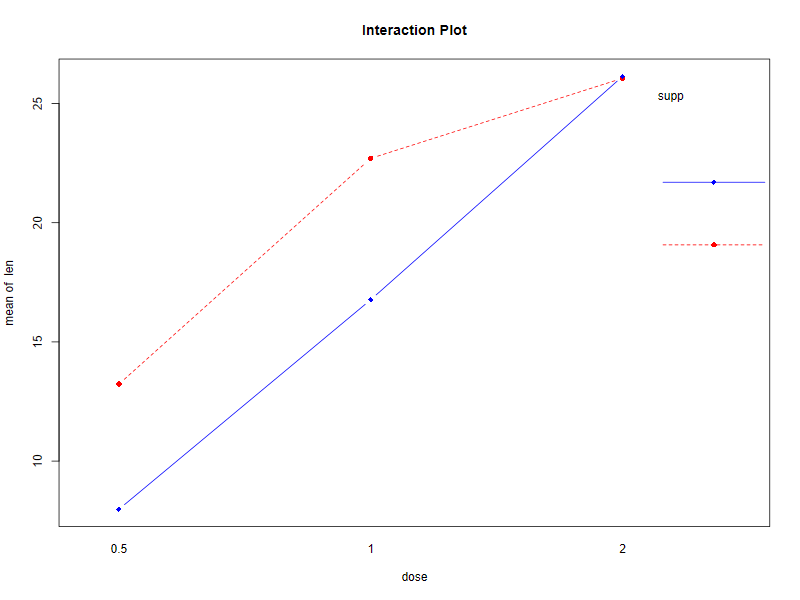

In [6]:
interaction.plot(
  dose, 
  supp, 
  len, 
  type="b", 
  col=c("red", "blue"), 
  pch=c(16, 18),
  main="Interaction Plot"
)

警告信息:
1: In grDevices::dev.copy(function() { :
  zero-length arrow is of indeterminate angle and so skipped
2: In grDevices::dev.copy(function() { :
  zero-length arrow is of indeterminate angle and so skipped
3: In grDevices::dev.copy(function() { :
  zero-length arrow is of indeterminate angle and so skipped
4: In grDevices::dev.copy(function() { :
  zero-length arrow is of indeterminate angle and so skipped
5: In grDevices::dev.copy(function() { :
  zero-length arrow is of indeterminate angle and so skipped
6: In grDevices::dev.copy(function() { :
  zero-length arrow is of indeterminate angle and so skipped
警告信息:
1: In arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd,  :
  zero-length arrow is of indeterminate angle and so skipped
2: In arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd,  :
  zero-length arrow is of indeterminate angle and so skipped
3: In arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd,  :
  zero-length arrow is of indeterminate angl

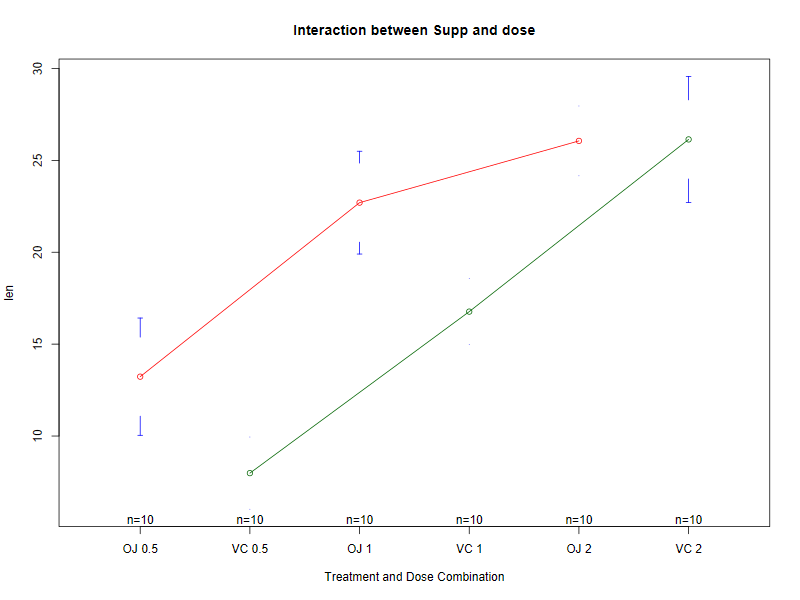

In [14]:
library("gplots",warn.conflicts = FALSE)

plotmeans(
  len~interaction(supp, dose, sep=" "),
  connect=list(c(1, 3, 5), c(2, 4, 6)),
  col=c("red", "darkgreen"),
  main="Interaction between Supp and dose",
  xlab="Treatment and Dose Combination"
)

载入需要的程序包：lattice
载入需要的程序包：grid
载入需要的程序包：latticeExtra
载入需要的程序包：multcomp
载入需要的程序包：mvtnorm
载入需要的程序包：survival
载入需要的程序包：TH.data
载入需要的程序包：MASS

载入程序包：‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser

载入需要的程序包：gridExtra

载入程序包：‘HH’

The following object is masked from ‘package:gplots’:

    residplot

The following object is masked from ‘package:base’:

    is.R



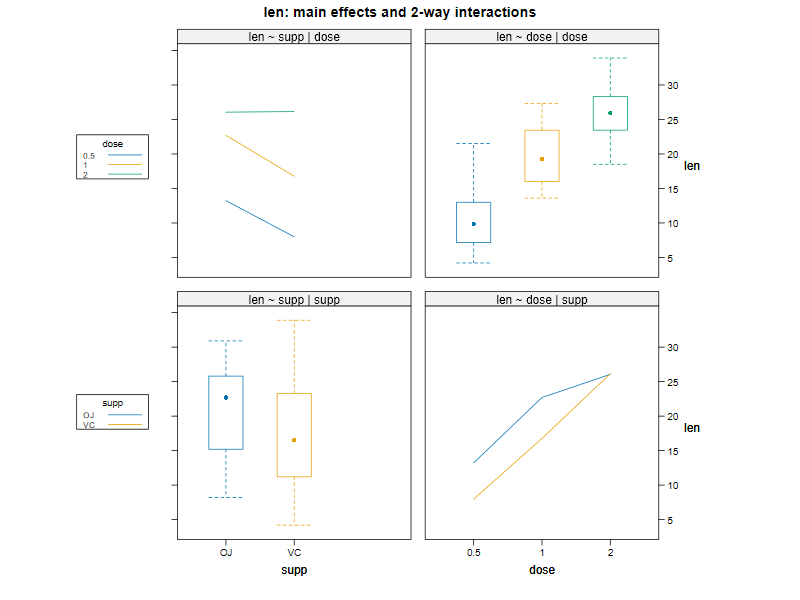

In [15]:
library(HH)
interaction2wt(len~supp*dose)

# 重复测量方差分析

In [16]:
CO2

   Plant        Type  Treatment conc uptake
1    Qn1      Quebec nonchilled   95   16.0
2    Qn1      Quebec nonchilled  175   30.4
3    Qn1      Quebec nonchilled  250   34.8
4    Qn1      Quebec nonchilled  350   37.2
5    Qn1      Quebec nonchilled  500   35.3
6    Qn1      Quebec nonchilled  675   39.2
7    Qn1      Quebec nonchilled 1000   39.7
8    Qn2      Quebec nonchilled   95   13.6
9    Qn2      Quebec nonchilled  175   27.3
10   Qn2      Quebec nonchilled  250   37.1
11   Qn2      Quebec nonchilled  350   41.8
12   Qn2      Quebec nonchilled  500   40.6
13   Qn2      Quebec nonchilled  675   41.4
14   Qn2      Quebec nonchilled 1000   44.3
15   Qn3      Quebec nonchilled   95   16.2
16   Qn3      Quebec nonchilled  175   32.4
17   Qn3      Quebec nonchilled  250   40.3
18   Qn3      Quebec nonchilled  350   42.1
19   Qn3      Quebec nonchilled  500   42.9
20   Qn3      Quebec nonchilled  675   43.9
21   Qn3      Quebec nonchilled 1000   45.5
22   Qc1      Quebec    chilled 

In [17]:
table(CO2$Type)


     Quebec Mississippi 
         42          42 

In [18]:
table(CO2$conc)


  95  175  250  350  500  675 1000 
  12   12   12   12   12   12   12 

In [19]:
class(CO2$conc)

[1] "numeric"

In [20]:
CO2$conc <- factor(CO2$conc)

In [23]:
w1b1 <- subset(CO2, Treatment=="chilled")
w1b1

   Plant        Type Treatment conc uptake
22   Qc1      Quebec   chilled   95   14.2
23   Qc1      Quebec   chilled  175   24.1
24   Qc1      Quebec   chilled  250   30.3
25   Qc1      Quebec   chilled  350   34.6
26   Qc1      Quebec   chilled  500   32.5
27   Qc1      Quebec   chilled  675   35.4
28   Qc1      Quebec   chilled 1000   38.7
29   Qc2      Quebec   chilled   95    9.3
30   Qc2      Quebec   chilled  175   27.3
31   Qc2      Quebec   chilled  250   35.0
32   Qc2      Quebec   chilled  350   38.8
33   Qc2      Quebec   chilled  500   38.6
34   Qc2      Quebec   chilled  675   37.5
35   Qc2      Quebec   chilled 1000   42.4
36   Qc3      Quebec   chilled   95   15.1
37   Qc3      Quebec   chilled  175   21.0
38   Qc3      Quebec   chilled  250   38.1
39   Qc3      Quebec   chilled  350   34.0
40   Qc3      Quebec   chilled  500   38.9
41   Qc3      Quebec   chilled  675   39.6
42   Qc3      Quebec   chilled 1000   41.4
64   Mc1 Mississippi   chilled   95   10.5
65   Mc1 Mi

In [24]:
fit <- aov(uptake~conc*Type+Error(Plant/(conc)), w1b1)
summary(fit)


Error: Plant
          Df Sum Sq Mean Sq F value  Pr(>F)   
Type       1 2667.2  2667.2   60.41 0.00148 **
Residuals  4  176.6    44.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Plant:conc
          Df Sum Sq Mean Sq F value   Pr(>F)    
conc       6 1472.4  245.40   52.52 1.26e-12 ***
conc:Type  6  428.8   71.47   15.30 3.75e-07 ***
Residuals 24  112.1    4.67                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

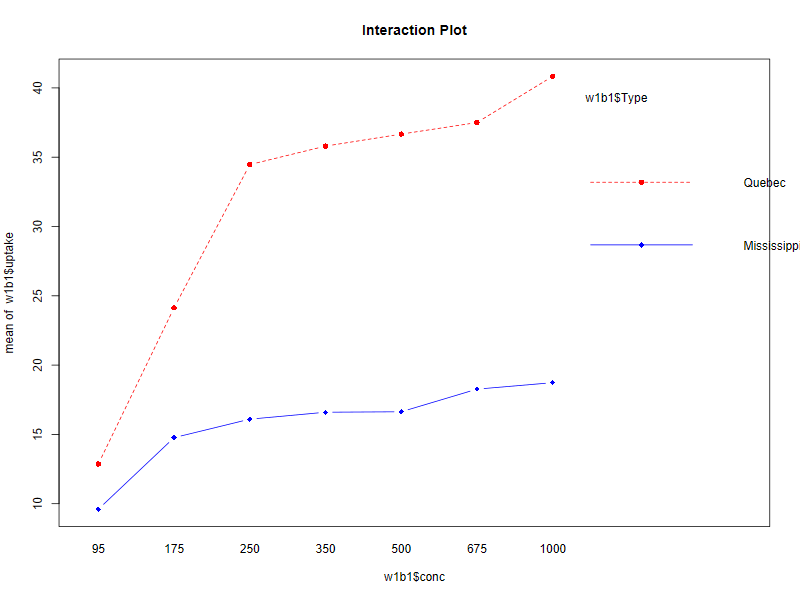

In [25]:
interaction.plot(
  w1b1$conc,
  w1b1$Type,
  w1b1$uptake,
  type="b",
  col=c("red", "blue"),
  pch=c(16, 18),
  main="Interaction Plot"
)

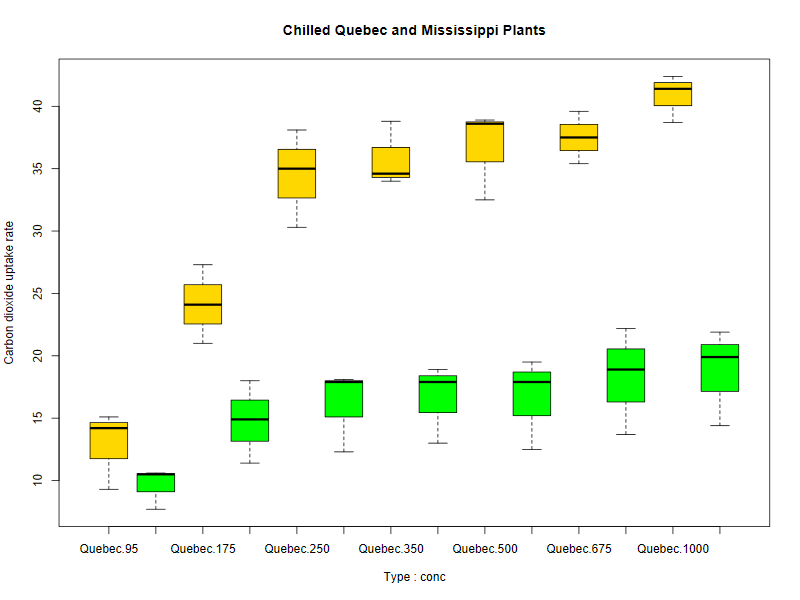

In [27]:
boxplot(
  uptake~Type*conc,
  data=w1b1,
  col=c("gold", "green"),
  main="Chilled Quebec and Mississippi Plants",
  ylab="Carbon dioxide uptake rate"
)

# 多元方差分析

In [29]:
library(MASS)
UScereal

                                      mfr  calories    protein       fat    sodium     fibre    carbo    sugars shelf potassium
100% Bran                               N 212.12121 12.1212121 3.0303030 393.93939 30.303030 15.15152 18.181818     3 848.48485
All-Bran                                K 212.12121 12.1212121 3.0303030 787.87879 27.272727 21.21212 15.151515     3 969.69697
All-Bran with Extra Fiber               K 100.00000  8.0000000 0.0000000 280.00000 28.000000 16.00000  0.000000     3 660.00000
Apple Cinnamon Cheerios                 G 146.66667  2.6666667 2.6666667 240.00000  2.000000 14.00000 13.333333     1  93.33333
Apple Jacks                             K 110.00000  2.0000000 0.0000000 125.00000  1.000000 11.00000 14.000000     2  30.00000
Basic 4                                 G 173.33333  4.0000000 2.6666667 280.00000  2.666667 24.00000 10.666667     3 133.33333
Bran Chex                               R 134.32836  2.9850746 1.4925373 298.50746  5.970149 22.38806  8

In [30]:
attach(UScereal)

In [31]:
shelf <- factor(shelf)

In [32]:
shelf

 [1] 3 3 3 1 2 3 1 3 2 1 2 3 2 1 1 2 2 3 3 3 3 2 1 2 3 3 2 1 2 3 3 3 2 1 1 3 2 2 2 3 1 2 3 3 3 3 3 3 2 3 3 1 1 1 1 2 1 3 3 3 3 2
[63] 1 1 1
Levels: 1 2 3

In [33]:
y <- cbind(calories, fat, sugars)
y

       calories       fat    sugars
 [1,] 212.12121 3.0303030 18.181818
 [2,] 212.12121 3.0303030 15.151515
 [3,] 100.00000 0.0000000  0.000000
 [4,] 146.66667 2.6666667 13.333333
 [5,] 110.00000 0.0000000 14.000000
 [6,] 173.33333 2.6666667 10.666667
 [7,] 134.32836 1.4925373  8.955224
 [8,] 134.32836 0.0000000  7.462687
 [9,] 160.00000 2.6666667 16.000000
[10,]  88.00000 1.6000000  0.800000
[11,] 160.00000 4.0000000 12.000000
[12,] 220.00000 4.0000000 14.000000
[13,] 110.00000 1.0000000 13.000000
[14,] 110.00000 0.0000000  3.000000
[15,] 100.00000 0.0000000  2.000000
[16,] 110.00000 0.0000000 12.000000
[17,] 110.00000 1.0000000 13.000000
[18,] 220.00000 6.0000000 14.000000
[19,] 110.00000 0.0000000  3.000000
[20,] 133.33333 1.3333333 13.333333
[21,] 133.33333 0.0000000  6.666667
[22,] 110.00000 1.0000000 13.000000
[23,] 146.66667 0.0000000 14.666667
[24,] 125.00000 0.0000000  8.750000
[25,] 179.10448 2.9850746 14.925373
[26,] 179.10448 0.0000000 17.910448
[27,] 146.66667 1.3333333 16

In [35]:
aggregate(y, by=list(shelf),  mean)

  Group.1 calories       fat    sugars
1       1 119.4774 0.6621338  6.295493
2       2 129.8162 1.3413488 12.507670
3       3 180.1466 1.9449071 10.856821

In [36]:
cov(y)

           calories       fat     sugars
calories 3895.24210 60.674383 180.380317
fat        60.67438  2.713399   3.995474
sugars    180.38032  3.995474  34.050018

In [37]:
fit <- manova(y~shelf)
summary(fit)

          Df Pillai approx F num Df den Df    Pr(>F)    
shelf      2 0.4021   5.1167      6    122 0.0001015 ***
Residuals 62                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [38]:
summary.aov(fit)

 Response calories :
            Df Sum Sq Mean Sq F value    Pr(>F)    
shelf        2  50435 25217.6  7.8623 0.0009054 ***
Residuals   62 198860  3207.4                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response fat :
            Df Sum Sq Mean Sq F value  Pr(>F)  
shelf        2  18.44  9.2199  3.6828 0.03081 *
Residuals   62 155.22  2.5035                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response sugars :
            Df  Sum Sq Mean Sq F value   Pr(>F)   
shelf        2  381.33 190.667  6.5752 0.002572 **
Residuals   62 1797.87  28.998                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


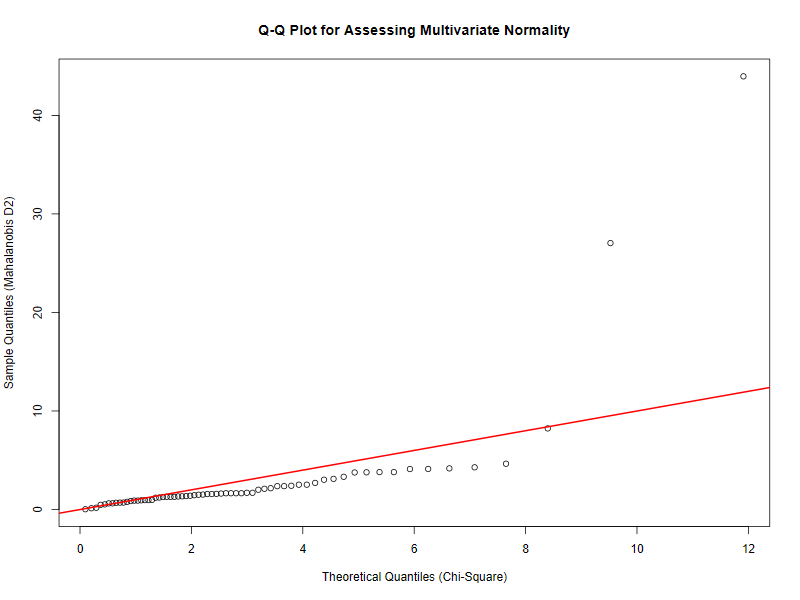

In [43]:
# 计算中心点和协方差矩阵
center <- colMeans(y)
n <- nrow(y)
p <- ncol(y)
cov <- cov(y)

# 计算马氏距离
d <- mahalanobis(y, center, cov)

# 绘制 QQ 图
qqplot(
  qchisq(ppoints(n), df = p),  # 卡方分布的理论分位数
  d,                           # 马氏距离
  main = "Q-Q Plot for Assessing Multivariate Normality",
  xlab = "Theoretical Quantiles (Chi-Square)",
  ylab = "Sample Quantiles (Mahalanobis D2)"
)

# 添加参考线
abline(a = 0, b = 1, col = "red", lwd = 2)

载入需要的程序包：sgeostat
Projection to the first and second robust principal components.
Proportion of total variation (explained variance): 0.9789888


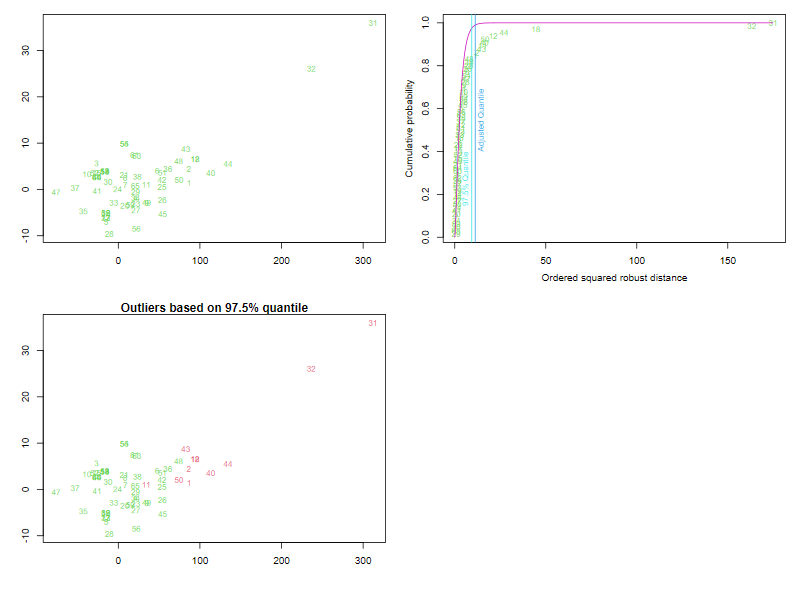

$outliers
 [1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[21] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[41] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE


In [44]:
library(mvoutlier)
outliers <- aq.plot(y)
outliers

# 稳健多元方差分析

In [46]:
library(rrcov)
Wilks.test(y, shelf, method="mcd")


	Robust One-way MANOVA (Bartlett Chi2)

data:  x
Wilks' Lambda = 0.42394, Chi2-Value = 20.6141, DF = 4.0501, p-value = 0.000397
sample estimates:
  calories       fat    sugars
1 118.1432 0.7449005  5.100422
2 126.7149 1.0724502 12.761427
3 160.1003 1.6591192  9.913359


# 用回归来做ANOVA

In [47]:
library(multcomp)
levels(cholesterol$trt)

[1] "1time"  "2times" "4times" "drugD"  "drugE" 

In [48]:
fit.aov <- aov(response~trt, data=cholesterol)
summary(fit.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [49]:
fit.lm <- lm(response~trt, data=cholesterol)
summary(fit.lm)


Call:
lm(formula = response ~ trt, data = cholesterol)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5418 -1.9672 -0.0016  1.8901  6.6008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.782      1.021   5.665 9.78e-07 ***
trt2times      3.443      1.443   2.385   0.0213 *  
trt4times      6.593      1.443   4.568 3.82e-05 ***
trtdrugD       9.579      1.443   6.637 3.53e-08 ***
trtdrugE      15.166      1.443  10.507 1.08e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.227 on 45 degrees of freedom
Multiple R-squared:  0.7425,	Adjusted R-squared:  0.7196 
F-statistic: 32.43 on 4 and 45 DF,  p-value: 9.819e-13


In [51]:
contrasts(cholesterol$trt)

       2times 4times drugD drugE
1time       0      0     0     0
2times      1      0     0     0
4times      0      1     0     0
drugD       0      0     1     0
drugE       0      0     0     1